In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import cv2
from matplotlib import pyplot as plt
import numpy as np

C:\Users\riyad\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\riyad\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\riyad\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Optional if you are using a GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
model = hub.load('https://tfhub.dev/google/movenet/multipose/lightning/1')
movenet = model.signatures['serving_default']

In [4]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    cv2.imshow('Movenet Multipose', frame)
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

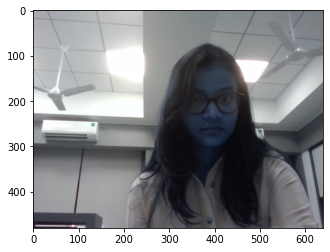

In [8]:
plt.imshow(frame)

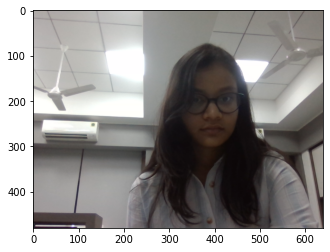

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [5]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    #Resize image
    img=frame.copy()
    img=tf.image.resize_with_pad(tf.expand_dims(img,axis=0), 256, 256)
    input_img=tf.cast(img,dtype=tf.int32)
    
    #Detection Section
    results=movenet(input_img)
    keypoints_with_scores=results['output_0'].numpy()[:,:,:51].reshape((6,17,3))
    print(keypoints_with_scores)
    
    cv2.imshow('Movenet Multipose', frame)
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

[[[3.16573173e-01 5.66488683e-01 6.65737927e-01]
  [2.42805779e-01 6.21466339e-01 6.13650620e-01]
  [2.45600671e-01 4.81436312e-01 5.44985235e-01]
  [2.66504019e-01 6.66190743e-01 5.77278733e-01]
  [2.74545759e-01 3.78397316e-01 4.01287436e-01]
  [5.09250045e-01 8.17005515e-01 3.59797716e-01]
  [6.33380055e-01 2.09277868e-01 4.81420457e-01]
  [8.30723763e-01 9.65091705e-01 2.56746709e-01]
  [8.66986275e-01 1.39137566e-01 6.31105006e-02]
  [7.95751035e-01 8.50461960e-01 2.89596841e-02]
  [8.37243676e-01 3.00935566e-01 2.21563745e-02]
  [8.79592180e-01 7.36563861e-01 1.73977111e-02]
  [8.77356112e-01 4.31527734e-01 2.18042126e-03]
  [8.56200039e-01 9.08042908e-01 4.36959714e-02]
  [8.10944557e-01 2.75065303e-01 6.85224636e-03]
  [5.70437610e-01 6.03617728e-01 1.10382389e-03]
  [5.55794597e-01 5.86050272e-01 1.73238688e-03]]

 [[2.20164716e-01 8.99723411e-01 1.34946443e-02]
  [2.49346361e-01 9.15396035e-01 7.79629173e-03]
  [2.18322769e-01 9.04173434e-01 9.33577865e-03]
  [2.61326224e-01 

[[[3.43200475e-01 5.49442053e-01 7.18126416e-01]
  [2.74299562e-01 6.08839095e-01 6.07489705e-01]
  [2.78538853e-01 4.80255634e-01 6.16549850e-01]
  [2.93711394e-01 6.61895096e-01 6.34105146e-01]
  [3.11330199e-01 3.89779478e-01 4.83277559e-01]
  [5.27400792e-01 8.10913026e-01 4.23942953e-01]
  [6.32949233e-01 2.37207681e-01 6.29512727e-01]
  [8.39690208e-01 9.46644425e-01 3.09201092e-01]
  [8.71649384e-01 1.59383491e-01 1.29948065e-01]
  [7.96209693e-01 7.96635151e-01 2.23677885e-02]
  [8.20241034e-01 3.21409822e-01 2.25568060e-02]
  [8.85049403e-01 7.48097181e-01 1.19918399e-02]
  [8.85965288e-01 4.24783349e-01 4.59456537e-03]
  [8.30169678e-01 8.86097610e-01 1.57227442e-02]
  [7.69135594e-01 2.92235345e-01 1.11774011e-02]
  [5.41555285e-01 6.00726664e-01 1.10373739e-03]
  [4.93129045e-01 5.88728726e-01 3.97254620e-03]]

 [[7.33987272e-01 5.75652301e-01 2.24319543e-03]
  [6.68648541e-01 6.46371245e-01 7.70056446e-04]
  [7.02073097e-01 4.97861445e-01 8.18526314e-04]
  [7.01734543e-01 

[[[3.4732834e-01 5.5261689e-01 6.7235780e-01]
  [2.7425304e-01 6.1293179e-01 5.8085346e-01]
  [2.8057727e-01 4.8310351e-01 5.2813345e-01]
  [2.9337537e-01 6.6710377e-01 6.6983765e-01]
  [3.1335056e-01 3.9448708e-01 4.6756756e-01]
  [5.3334326e-01 8.1451869e-01 4.3806097e-01]
  [6.3283044e-01 2.3544353e-01 6.4063448e-01]
  [8.4313607e-01 9.6419472e-01 2.8423604e-01]
  [8.7199616e-01 1.6171980e-01 1.0713892e-01]
  [7.5789368e-01 7.9307115e-01 2.0157052e-02]
  [8.1048268e-01 3.1858003e-01 2.7120920e-02]
  [8.8609189e-01 7.3541540e-01 7.1500982e-03]
  [8.8658774e-01 4.2731062e-01 2.0361717e-03]
  [8.4785622e-01 9.0125155e-01 2.0203954e-02]
  [7.8975189e-01 2.9101044e-01 1.0543328e-02]
  [5.6826067e-01 5.8851045e-01 1.1016043e-03]
  [5.3745002e-01 5.6664932e-01 3.6605757e-03]]

 [[7.1302187e-01 5.2453309e-01 3.4138407e-03]
  [6.6551191e-01 6.3130659e-01 6.4169156e-04]
  [7.0286256e-01 4.9689993e-01 1.1665280e-03]
  [7.0023245e-01 6.9078714e-01 1.5225582e-04]
  [6.8190569e-01 4.5088944e-01 6

[[[3.43335718e-01 5.53994238e-01 7.25381017e-01]
  [2.71809280e-01 6.13310516e-01 5.69629848e-01]
  [2.78112799e-01 4.81614530e-01 6.01442933e-01]
  [2.90631235e-01 6.68494821e-01 6.93201184e-01]
  [3.13497990e-01 3.93951446e-01 4.65946496e-01]
  [5.25174260e-01 8.15111160e-01 5.28841138e-01]
  [6.25908971e-01 2.42089286e-01 5.68145216e-01]
  [8.40611279e-01 9.46995616e-01 3.68225634e-01]
  [8.68886411e-01 1.67188153e-01 9.92232040e-02]
  [8.02695930e-01 8.11128974e-01 1.54836122e-02]
  [8.09584081e-01 3.20149928e-01 2.53259316e-02]
  [8.85903180e-01 7.46734560e-01 1.23363174e-02]
  [8.85302722e-01 4.58665818e-01 4.42862185e-03]
  [8.68227422e-01 9.07908738e-01 1.89874079e-02]
  [7.92479038e-01 2.90551662e-01 9.86663625e-03]
  [5.85581958e-01 5.97173333e-01 9.27280984e-04]
  [5.54238856e-01 5.75749159e-01 2.08613020e-03]]

 [[3.43335718e-01 5.53994238e-01 7.25381017e-01]
  [2.72995621e-01 6.11398995e-01 5.09611905e-01]
  [2.78112799e-01 4.81614530e-01 6.01442933e-01]
  [2.90631235e-01 

[[[3.47683877e-01 5.55890203e-01 6.36748731e-01]
  [2.73933172e-01 6.16217434e-01 6.88911557e-01]
  [2.78807402e-01 4.85854149e-01 5.46564460e-01]
  [2.99621284e-01 6.68968797e-01 6.28645360e-01]
  [3.16107452e-01 3.97181600e-01 5.82425833e-01]
  [5.32440066e-01 8.11448634e-01 3.98770750e-01]
  [6.35509312e-01 2.38308862e-01 6.44107819e-01]
  [8.50085914e-01 9.53405619e-01 3.53342831e-01]
  [8.75680923e-01 1.76470160e-01 6.58463985e-02]
  [7.82506108e-01 7.74125636e-01 1.50411697e-02]
  [8.10682297e-01 3.18139106e-01 2.74501033e-02]
  [8.84124577e-01 7.47749448e-01 6.41463511e-03]
  [8.85862589e-01 4.57652152e-01 1.79622159e-03]
  [8.69896591e-01 9.09457505e-01 1.67846121e-02]
  [7.92531788e-01 2.76493460e-01 1.14887692e-02]
  [5.70171833e-01 5.64635813e-01 1.47702219e-03]
  [5.55913389e-01 5.86207092e-01 2.71819625e-03]]

 [[7.12659121e-01 5.22711039e-01 3.76190734e-03]
  [6.68199480e-01 6.43384635e-01 8.29091587e-04]
  [6.99867308e-01 4.96114641e-01 1.11860863e-03]
  [6.55772448e-01 

[[[3.4674180e-01 5.6256080e-01 6.2131852e-01]
  [2.7723876e-01 6.1972797e-01 7.3031700e-01]
  [2.8320935e-01 4.8977551e-01 5.8956468e-01]
  [3.0168831e-01 6.7507988e-01 5.6749994e-01]
  [3.2178625e-01 4.1006759e-01 5.6852263e-01]
  [5.3678954e-01 8.1254548e-01 5.4019243e-01]
  [6.3826251e-01 2.5183839e-01 5.1525909e-01]
  [8.4863746e-01 9.5558000e-01 4.3347779e-01]
  [8.7139851e-01 1.9048586e-01 6.8911955e-02]
  [7.6084554e-01 7.8919142e-01 1.3477317e-02]
  [8.2922709e-01 3.3737096e-01 2.2740569e-02]
  [8.8592172e-01 7.9303783e-01 4.4872076e-03]
  [8.8828892e-01 4.5458782e-01 1.9035195e-03]
  [8.7024325e-01 9.1054922e-01 1.3752507e-02]
  [8.0794162e-01 3.0225375e-01 1.0410397e-02]
  [6.2216502e-01 5.5982542e-01 2.0758654e-03]
  [5.9070981e-01 6.0716134e-01 1.6704391e-03]]

 [[7.1022153e-01 5.2474844e-01 1.9550638e-03]
  [6.7994571e-01 6.4252067e-01 2.0671167e-04]
  [7.0023680e-01 5.1000184e-01 7.8393525e-04]
  [6.6949940e-01 6.9849151e-01 7.8637691e-05]
  [6.7906892e-01 4.6661764e-01 4

[[[3.5934862e-01 5.8081383e-01 6.5015143e-01]
  [2.9272959e-01 6.3277882e-01 6.5452564e-01]
  [2.9813895e-01 5.0647312e-01 6.7911512e-01]
  [3.1523570e-01 6.8536085e-01 6.6749424e-01]
  [3.3285460e-01 4.2529714e-01 5.7590270e-01]
  [5.5313998e-01 8.1483269e-01 5.4074901e-01]
  [6.3707811e-01 2.7057454e-01 5.5095863e-01]
  [8.4712791e-01 9.6485990e-01 3.8316074e-01]
  [8.7032247e-01 2.1348815e-01 7.9935052e-02]
  [7.8287876e-01 7.4123096e-01 1.5056930e-02]
  [8.2402432e-01 3.5618648e-01 2.2843363e-02]
  [8.8762110e-01 7.4293649e-01 4.7373497e-03]
  [8.8330895e-01 4.4186476e-01 3.8604084e-03]
  [7.9927015e-01 9.2326027e-01 1.1522519e-02]
  [7.7267164e-01 3.2019076e-01 8.2158595e-03]
  [5.8802426e-01 5.6849736e-01 2.3194714e-03]
  [5.7425070e-01 6.0197228e-01 2.3219083e-03]]

 [[5.1230079e-01 2.2221850e-02 2.7301044e-03]
  [3.9859247e-01 6.7070976e-02 5.0169621e-03]
  [3.9847383e-01 7.2445653e-02 3.4458123e-03]
  [4.0648535e-01 6.0544815e-02 3.5892702e-03]
  [4.0442583e-01 7.3396645e-02 4

[[[4.1735691e-01 6.0009706e-01 7.2596288e-01]
  [3.5358343e-01 6.5318602e-01 6.8990749e-01]
  [3.5559946e-01 5.3853405e-01 7.0892787e-01]
  [3.7112424e-01 7.0402145e-01 6.3254184e-01]
  [3.8454428e-01 4.5992121e-01 6.0361123e-01]
  [6.1732697e-01 8.3252800e-01 7.5948781e-01]
  [6.6962165e-01 3.2729366e-01 6.4521366e-01]
  [8.6535358e-01 9.6418601e-01 3.7758577e-01]
  [8.6974281e-01 2.5826380e-01 9.2049606e-02]
  [8.1963336e-01 7.9097432e-01 1.7753417e-02]
  [8.4479493e-01 3.6819008e-01 1.7602907e-02]
  [8.8286823e-01 7.5475854e-01 1.5508597e-03]
  [8.7908143e-01 4.7298408e-01 1.0150742e-03]
  [7.6484579e-01 8.5212058e-01 7.4592181e-03]
  [7.6258093e-01 3.8355461e-01 1.0932506e-02]
  [5.0309604e-01 7.0746130e-01 4.2087818e-03]
  [5.1019621e-01 6.7313027e-01 1.3269906e-02]]

 [[4.1735691e-01 6.0009706e-01 7.2596288e-01]
  [3.5358343e-01 6.5318602e-01 6.8990749e-01]
  [3.5559946e-01 5.3853405e-01 7.0892787e-01]
  [3.7112424e-01 7.0402145e-01 6.3254184e-01]
  [3.8524693e-01 4.6344718e-01 4

[[[4.51692551e-01 6.16125941e-01 6.59536421e-01]
  [3.92761856e-01 6.63369834e-01 5.18269956e-01]
  [3.95986199e-01 5.55312932e-01 6.85332894e-01]
  [4.02310133e-01 7.00049460e-01 6.95747912e-01]
  [4.14024115e-01 4.83735114e-01 5.93558252e-01]
  [6.46413684e-01 8.33146691e-01 8.14355254e-01]
  [6.96303308e-01 3.50907236e-01 7.60148466e-01]
  [8.67534697e-01 9.62284505e-01 3.28422755e-01]
  [8.73904705e-01 2.98920333e-01 8.49264488e-02]
  [8.37705314e-01 7.87755787e-01 2.60200221e-02]
  [8.24443281e-01 4.02838707e-01 1.33919585e-02]
  [8.78449619e-01 7.46345282e-01 4.43902845e-03]
  [8.76210809e-01 4.72867489e-01 2.79194769e-03]
  [8.10657024e-01 8.68118107e-01 1.43503789e-02]
  [7.92411327e-01 4.15945530e-01 9.98313352e-03]
  [5.44432044e-01 7.38941669e-01 4.75316960e-03]
  [5.46817064e-01 6.66630507e-01 3.93955177e-03]]

 [[6.54312193e-01 8.45109403e-01 6.97798608e-03]
  [6.25254393e-01 8.26448560e-01 3.25247529e-03]
  [6.24131799e-01 8.24178696e-01 1.35982188e-03]
  [6.02246702e-01 

[[[ 4.85925019e-01  6.16229594e-01  6.99064434e-01]
  [ 4.29632425e-01  6.62095606e-01  6.89825892e-01]
  [ 4.35815215e-01  5.61028421e-01  5.38868070e-01]
  [ 4.42200750e-01  7.02819288e-01  5.52898169e-01]
  [ 4.58064646e-01  4.98876303e-01  6.28612638e-01]
  [ 6.65227413e-01  8.24329972e-01  7.93342412e-01]
  [ 7.26032019e-01  3.81017923e-01  5.33799231e-01]
  [ 8.68422449e-01  9.42036450e-01  3.80847633e-01]
  [ 8.74559522e-01  3.49675566e-01  6.24624193e-02]
  [ 8.58667850e-01  7.82432139e-01  1.01578347e-01]
  [ 8.44802260e-01  4.59995598e-01  3.12009696e-02]
  [ 8.73810947e-01  7.52340972e-01  2.26720460e-02]
  [ 8.65007639e-01  5.48771322e-01  7.34016998e-03]
  [ 8.50521147e-01  8.67162883e-01  2.27703359e-02]
  [ 8.42118979e-01  4.26029682e-01  1.74796861e-02]
  [ 5.88074923e-01  7.54853845e-01  4.42995783e-03]
  [ 6.07008100e-01  6.86795831e-01  2.17524730e-03]]

 [[ 8.56263459e-01  1.89229697e-02  1.73185463e-03]
  [ 8.54241848e-01  1.63151715e-02  1.26476388e-03]
  [ 8.5343

[[[ 4.86209869e-01  6.06616557e-01  5.85242987e-01]
  [ 4.31807905e-01  6.52750671e-01  6.75902963e-01]
  [ 4.34327185e-01  5.53623796e-01  6.57170415e-01]
  [ 4.44016933e-01  6.94611907e-01  5.69332123e-01]
  [ 4.57499236e-01  4.95790958e-01  6.73068166e-01]
  [ 6.61308348e-01  8.10516715e-01  7.43796170e-01]
  [ 7.22207367e-01  3.78913224e-01  5.96420527e-01]
  [ 8.73326540e-01  9.05607581e-01  3.38757932e-01]
  [ 8.75481427e-01  3.48431945e-01  1.23028383e-01]
  [ 8.53244662e-01  7.11273670e-01  1.27249792e-01]
  [ 8.45655441e-01  4.44687188e-01  3.52288671e-02]
  [ 8.71596158e-01  7.32917368e-01  1.74945798e-02]
  [ 8.71403933e-01  4.87916529e-01  8.43839347e-03]
  [ 8.59373033e-01  8.97376001e-01  2.00774074e-02]
  [ 8.40838552e-01  4.25940752e-01  2.02216171e-02]
  [ 5.82141638e-01  7.30640411e-01  4.45329212e-03]
  [ 6.40647113e-01  6.61464155e-01  2.04955717e-03]]

 [[ 8.56977701e-01  1.87077411e-02  1.74174854e-03]
  [ 8.54409635e-01  1.62409302e-02  1.20833295e-03]
  [ 8.5355

[[[ 4.81645465e-01  6.07689083e-01  5.71052969e-01]
  [ 4.28913325e-01  6.53449655e-01  6.91467524e-01]
  [ 4.26937580e-01  5.54032922e-01  7.34832287e-01]
  [ 4.41655964e-01  6.94383025e-01  5.50912738e-01]
  [ 4.47648257e-01  4.94251341e-01  6.53887153e-01]
  [ 6.67973101e-01  8.09257090e-01  7.70663738e-01]
  [ 7.16784775e-01  3.74844134e-01  5.97680032e-01]
  [ 8.72126281e-01  9.04694438e-01  3.14078450e-01]
  [ 8.77056718e-01  3.37907910e-01  1.43400982e-01]
  [ 8.44609916e-01  7.29942322e-01  9.56473947e-02]
  [ 8.35653543e-01  4.26959217e-01  3.40389982e-02]
  [ 8.70887816e-01  7.25249529e-01  1.71446782e-02]
  [ 8.69483113e-01  4.87908721e-01  9.99295805e-03]
  [ 8.59483600e-01  8.97379577e-01  3.18050757e-02]
  [ 8.39866877e-01  4.10782933e-01  1.76486727e-02]
  [ 5.78057587e-01  7.22874939e-01  4.37772274e-03]
  [ 6.39952004e-01  6.46292031e-01  2.25803792e-03]]

 [[ 9.28309083e-01  9.77231145e-01  1.40980612e-02]
  [ 8.40218306e-01  9.24700975e-01  2.61444156e-03]
  [ 8.3625

[[[ 4.80787426e-01  6.11301005e-01  6.17830396e-01]
  [ 4.26160812e-01  6.55550361e-01  6.72420204e-01]
  [ 4.26039934e-01  5.54443300e-01  7.19867587e-01]
  [ 4.35645282e-01  6.95388556e-01  5.55863380e-01]
  [ 4.47378755e-01  4.96697336e-01  6.53165102e-01]
  [ 6.69370651e-01  8.16917598e-01  7.85173297e-01]
  [ 7.19429851e-01  3.76017213e-01  5.81712544e-01]
  [ 8.74079585e-01  9.09058511e-01  2.93486774e-01]
  [ 8.76409113e-01  3.40451211e-01  1.14420213e-01]
  [ 8.57196093e-01  7.52349496e-01  9.48110670e-02]
  [ 8.43952358e-01  4.44019526e-01  3.28601338e-02]
  [ 8.75631869e-01  7.46497452e-01  1.66647024e-02]
  [ 8.69429767e-01  4.87624198e-01  9.19160806e-03]
  [ 8.60404611e-01  9.01333690e-01  3.08207497e-02]
  [ 8.40970278e-01  4.12158191e-01  1.68115925e-02]
  [ 5.81376135e-01  7.32624531e-01  4.83461935e-03]
  [ 6.40944362e-01  6.43435597e-01  2.65079713e-03]]

 [[ 8.48406255e-01  1.75815485e-02  1.31560466e-03]
  [ 8.46266270e-01  1.51771577e-02  1.09368877e-03]
  [ 8.4526

[[[ 4.79386985e-01  6.15521193e-01  7.15927422e-01]
  [ 4.23866272e-01  6.61200523e-01  6.15138054e-01]
  [ 4.25827563e-01  5.57109594e-01  6.41867220e-01]
  [ 4.37003940e-01  7.01881111e-01  5.16403854e-01]
  [ 4.47499096e-01  4.98970866e-01  6.29050195e-01]
  [ 6.67181730e-01  8.24450374e-01  8.07190299e-01]
  [ 7.22165167e-01  3.76774579e-01  5.75898945e-01]
  [ 8.74858797e-01  9.18873668e-01  3.20242196e-01]
  [ 8.74265552e-01  3.46740752e-01  1.05479695e-01]
  [ 8.58991981e-01  7.48080850e-01  1.00228719e-01]
  [ 8.43354583e-01  4.76760238e-01  3.57589275e-02]
  [ 8.70764732e-01  7.35049307e-01  2.50752103e-02]
  [ 8.65270317e-01  5.33526361e-01  1.07546113e-02]
  [ 8.59454632e-01  9.03255045e-01  2.24041976e-02]
  [ 8.40974808e-01  4.13179874e-01  1.99373774e-02]
  [ 5.70269883e-01  7.36129701e-01  5.04161511e-03]
  [ 6.21469140e-01  6.57584906e-01  1.99719146e-03]]

 [[ 8.57074380e-01  1.34539932e-01  1.26652112e-02]
  [ 8.54772687e-01  1.33211717e-01  6.73434744e-03]
  [ 8.5368

[[[ 4.85852689e-01  6.15490198e-01  6.77601397e-01]
  [ 4.26457733e-01  6.60214365e-01  5.68158329e-01]
  [ 4.34519321e-01  5.57051718e-01  6.24392331e-01]
  [ 4.33103055e-01  6.99044526e-01  6.96293592e-01]
  [ 4.56981033e-01  4.97230023e-01  6.38752460e-01]
  [ 6.70549035e-01  8.30314457e-01  7.55772591e-01]
  [ 7.26413846e-01  3.82588655e-01  5.09458721e-01]
  [ 8.76182973e-01  9.21595812e-01  2.91802913e-01]
  [ 8.72378469e-01  3.56265694e-01  4.77851667e-02]
  [ 8.58625889e-01  7.36672103e-01  8.40390772e-02]
  [ 8.47472668e-01  4.44454819e-01  3.16965170e-02]
  [ 8.75712931e-01  7.56284058e-01  1.84323769e-02]
  [ 8.66991162e-01  5.48717916e-01  8.14925693e-03]
  [ 8.60830605e-01  9.02668178e-01  2.69668475e-02]
  [ 8.41152906e-01  4.28348780e-01  1.68110747e-02]
  [ 5.73740184e-01  7.47097969e-01  4.64506494e-03]
  [ 6.22372925e-01  6.72188163e-01  1.24853116e-03]]

 [[ 8.54015470e-01  3.30488421e-02  3.60070029e-03]
  [ 8.52599204e-01  3.02785635e-02  1.99497747e-03]
  [ 8.5224

[[[4.88229901e-01 6.16595685e-01 7.41038084e-01]
  [4.29021031e-01 6.62207961e-01 6.76747620e-01]
  [4.38464642e-01 5.56599796e-01 5.94672918e-01]
  [4.35693711e-01 7.06397712e-01 5.36209226e-01]
  [4.59521174e-01 4.99619782e-01 6.29433751e-01]
  [6.64980412e-01 8.32458913e-01 7.68665969e-01]
  [7.26521969e-01 3.85496914e-01 4.46556628e-01]
  [8.74245286e-01 9.31550562e-01 3.80362362e-01]
  [8.71203005e-01 3.58587891e-01 8.57114345e-02]
  [8.61009300e-01 7.49450266e-01 1.08391263e-01]
  [8.47489119e-01 4.58022922e-01 2.97374837e-02]
  [8.73146892e-01 7.56614149e-01 3.41853052e-02]
  [8.66268575e-01 5.50553560e-01 1.71631984e-02]
  [8.59805226e-01 9.04005110e-01 2.35692002e-02]
  [8.42337430e-01 4.26354736e-01 1.43824294e-02]
  [5.71937501e-01 7.50179112e-01 5.56119531e-03]
  [6.22657478e-01 6.86360896e-01 1.53488596e-03]]

 [[8.46280575e-01 3.31754051e-02 3.65408463e-03]
  [8.45117092e-01 3.00473124e-02 2.30219611e-03]
  [8.44614625e-01 3.30522284e-02 1.93902175e-03]
  [8.50576878e-01 

[[[ 4.88556772e-01  6.19517565e-01  7.24881589e-01]
  [ 4.32811618e-01  6.67700768e-01  7.12274849e-01]
  [ 4.36674863e-01  5.65404356e-01  5.87552488e-01]
  [ 4.45755422e-01  7.10347116e-01  6.25857532e-01]
  [ 4.58838820e-01  5.04140973e-01  6.50115609e-01]
  [ 6.63405955e-01  8.32987189e-01  8.02116156e-01]
  [ 7.20375121e-01  3.87567729e-01  5.62193751e-01]
  [ 8.74110520e-01  9.30566311e-01  3.37462902e-01]
  [ 8.71921062e-01  3.59873623e-01  1.00456998e-01]
  [ 8.61427665e-01  7.50164270e-01  1.16705485e-01]
  [ 8.48590791e-01  4.57796067e-01  3.84279974e-02]
  [ 8.72314513e-01  7.46695340e-01  3.88290770e-02]
  [ 8.66303563e-01  5.34564018e-01  1.65126696e-02]
  [ 8.57961059e-01  8.84626269e-01  1.80408116e-02]
  [ 8.43768477e-01  4.12588298e-01  1.78655162e-02]
  [ 5.70908427e-01  7.50881195e-01  4.41192091e-03]
  [ 6.42095387e-01  6.59574270e-01  1.80994533e-03]]

 [[ 8.55235338e-01  1.95737742e-02  2.59186863e-03]
  [ 8.53150845e-01  1.65287927e-02  2.00026133e-03]
  [ 8.5231

In [17]:
results['output_0'].numpy()[:,:,:51].reshape((6,17,3))

array([[[5.70208907e-01, 5.75966179e-01, 6.08504176e-01],
        [5.06842017e-01, 6.33515358e-01, 7.75707662e-01],
        [5.00060141e-01, 5.13023138e-01, 6.01094067e-01],
        [5.33758402e-01, 6.86144590e-01, 6.99032545e-01],
        [5.34272432e-01, 4.40241009e-01, 6.66033983e-01],
        [8.33201826e-01, 8.14342380e-01, 6.80323422e-01],
        [8.30084324e-01, 2.57899553e-01, 8.09449315e-01],
        [8.64194930e-01, 8.28869820e-01, 8.59483334e-05],
        [8.70105028e-01, 2.17494473e-01, 6.59596000e-04],
        [8.36167634e-01, 6.98689818e-01, 1.42488666e-02],
        [8.30915689e-01, 3.82860243e-01, 1.41550247e-02],
        [8.80816698e-01, 6.74828112e-01, 6.48319668e-13],
        [8.83773983e-01, 3.63428354e-01, 4.05186681e-13],
        [8.32258463e-01, 8.05875540e-01, 3.52341705e-03],
        [8.45233679e-01, 3.86168569e-01, 1.11453468e-03],
        [3.94402117e-01, 6.70865119e-01, 1.43077224e-03],
        [4.83158350e-01, 4.28392649e-01, 8.65748443e-04]],

       [[4.0

In [13]:
keypoints_with_scores[0]

array([[5.45523822e-01, 6.66168511e-01, 5.11462033e-01],
       [4.72791135e-01, 7.25180745e-01, 7.20276177e-01],
       [4.81688291e-01, 5.92889130e-01, 6.67711437e-01],
       [5.03620446e-01, 7.79243886e-01, 5.34496129e-01],
       [5.19419491e-01, 5.02814114e-01, 7.06317246e-01],
       [8.20073187e-01, 9.64192271e-01, 5.09127319e-01],
       [8.61224353e-01, 3.47690135e-01, 5.65548599e-01],
       [8.78158510e-01, 9.50845242e-01, 5.21978909e-05],
       [8.68473709e-01, 3.08431506e-01, 7.06066858e-05],
       [8.49150062e-01, 8.06441307e-01, 2.14016456e-02],
       [8.35521936e-01, 4.76656318e-01, 1.67941079e-02],
       [8.84524226e-01, 8.50393772e-01, 1.07682495e-10],
       [8.76590848e-01, 5.57864428e-01, 1.38666327e-11],
       [8.43556821e-01, 9.31069911e-01, 2.89087575e-02],
       [8.41920793e-01, 5.56487024e-01, 3.42532014e-03],
       [3.42616051e-01, 8.38662207e-01, 8.79663695e-03],
       [3.08984101e-01, 6.60134494e-01, 1.03006070e-03]], dtype=float32)

In [14]:
keypoints_with_scores.shape

(6, 17, 3)

In [6]:
#Function to loop through each person detected and render
def loop_through_people(frame, keypoints_with_scores, edges, confidence_threshold):
    for person in keypoints_with_scores:
        draw_connections(frame, person, edges, confidence_threshold)
        draw_keypoints(frame, person, confidence_threshold)

In [16]:
#DRAW KEYPOINTS

In [7]:
def draw_keypoints(frame, keypoints, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    for kp in shaped:
        ky, kx, kp_conf = kp
        if kp_conf > confidence_threshold:
            cv2.circle(frame, (int(kx), int(ky)), 6, (0,255,0), -1)

In [18]:
#DRAW EDGES

In [10]:
EDGES = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

In [11]:
def draw_connections(frame, keypoints, edges, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for edge, color in edges.items():
        p1, p2 = edge
        y1, x1, c1 = shaped[p1]
        y2, x2, c2 = shaped[p2]
        
        if (c1 > confidence_threshold) & (c2 > confidence_threshold):      
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,255), 4)

In [12]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    #Resize image
    img=frame.copy()
    img=tf.image.resize_with_pad(tf.expand_dims(img,axis=0), 192, 256)
    input_img=tf.cast(img,dtype=tf.int32)
    
    #Detection Section
    results=movenet(input_img)
    keypoints_with_scores=results['output_0'].numpy()[:,:,:51].reshape((6,17,3))
    
    #Render keypoints
    loop_through_people(frame, keypoints_with_scores, EDGES, 0.3)
    
    cv2.imshow('Movenet Multipose', frame)
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()